In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Tiago & Marisol - Group 6

**Course:** Python Essentials with Data Analysis COMP-2040   
**Assignment:** Case Study #1: Linear Regression of Height & Weight

In [3]:
people = pd.read_csv("height_mass.csv") 
people.columns = ['height', 'mass']
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  15 non-null     float64
 1   mass    15 non-null     float64
dtypes: float64(2)
memory usage: 372.0 bytes


In [4]:
people

,height,mass
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


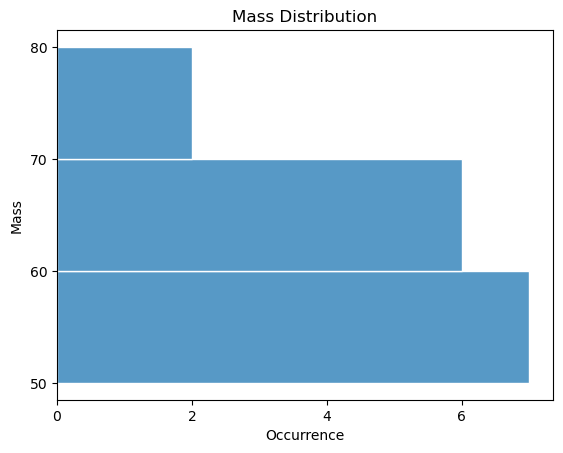

In [5]:
sb.histplot(people, 
            y='mass',
            bins=[50, 60, 70, 80],
            edgecolor='white',
           )
plt.title('Mass Distribution')
plt.xlabel('Occurrence')
plt.ylabel('Mass')
plt.xticks([0, 2, 4, 6])
plt.yticks([50, 60, 70, 80])
plt.show()

_seaborn.histplot:Plot univariate or bivariate histograms to show distributions of datasets._   

>_"The choice of bins for computing and plotting a histogram can exert substantial influence on the insights that one is able to draw from the visualization. If the bins are too large, they may erase important features. On the other hand, bins that are too small may be dominated by random variability, obscuring the shape of the true underlying distribution. The default bin size is determined using a reference rule that depends on the sample size and variance. This works well in many cases, (i.e., with “well-behaved” data) but it fails in others. It is always a good to try different bin sizes to be sure that you are not missing something important. This function allows you to specify bins in several different ways, such as by setting the total number of bins to use, the width of each bin, or the specific locations where the bins should break."_
----------------------
### Answer

**What does the plot tell you about the data?**    
The graph shows the distribution (ranges) that exist in the 'Mass (kg)' column in the 'people' data.

**Conclusion**  
With the parameter _bins=[50, 60, 70, 80]_ set for 3 bars we get a visualization of the data distribution in ranges of 10, from the data we can see that the most common weight in this sample is bewteen the range of 50kg to 60 kg, second most is 60kg to 70kg, and only two occurrences happen between 70 kg to 80 kg. If we set in ranges of 5 kg, for example, we would get a different distribution of the data, showing that occurrences are almost equally distributed from 50 kg to 75 kg.

| Range | Frequency |
| :--- | ---: |
| (50 - 60) | 7 |
| (60 - 70) | 6 |
| (70 - 80) | 2 |

----------------------
_https://seaborn.pydata.org/generated/seaborn.histplot.html_

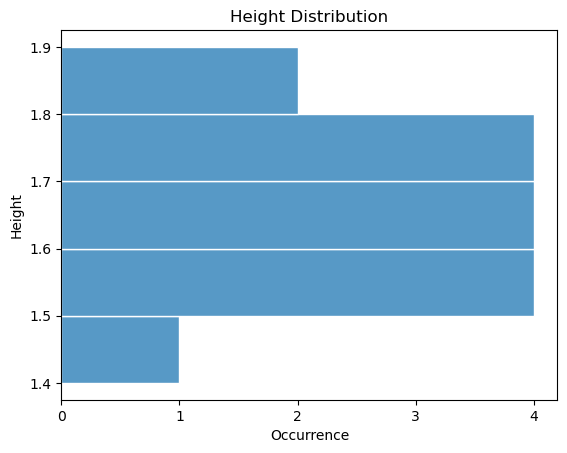

In [6]:
sb.histplot(people, y='height', edgecolor='white', bins=[1.40, 1.50, 1.60, 1.70, 1.80, 1.90])
plt.title('Height Distribution')
plt.xlabel('Occurrence')
plt.ylabel('Height')
plt.xticks([0, 1, 2, 3, 4])
plt.yticks([1.40, 1.50, 1.60, 1.70, 1.80, 1.90])
plt.show()

### Answer

**What does the plot tell you about the data?**    
The plot shows the distribution of a variable related to Height(m), likely a histogram or density plot. The x-axis represents the height in meters, while the y-axis shows the count or frequency of observations at each height.

**Conclusion**  
The histogram groups the data into intervals and displays the frequency of each interval, with intervals of 10cm each, beginning at 1.40 m until 1.90 m. We see that sample most common height stay between ranges from 1.50 m to 1.80 m, 4 occurrences at each 10 cm, and less than 1.50 m or more than 1.80 m are less common heights.

| Range | Frequency |
| :--- | ---: |
| (1.4 - 1.5) | 1 |
| (1.5 - 1.6) | 4 |
| (1.6 - 1.7) | 4 |
| (1.7 - 1.8) | 4 |
| (1.8 - 1.9) | 2 |

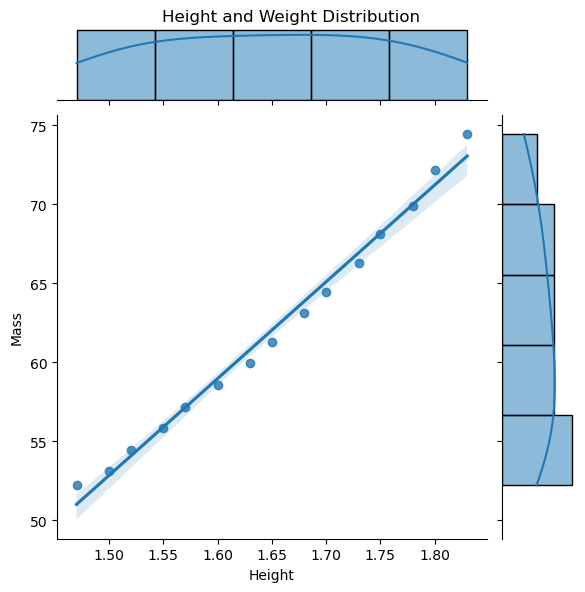

In [7]:
sb.jointplot(people,
             x='height', 
             y='mass',
             kind='reg'
            ).set_axis_labels('Height', 'Mass')
plt.suptitle('Height and Weight Distribution')
plt.subplots_adjust(top=0.95)
plt.show()

### Answer

**Does this plot confirm what the histplot showed?**  
Although the difference between a histogram and a plot is that in the histogram we observe ranges for our variable, while in the joint plot we view the data information point by point, matching rows. This plot does confirm the information shown in the histplot, by showing the relation between height and weight, if a person is taller, their weight is bigger, so, in this sample, high height is equal high mass.

**Conclusion**  
This type of joint plot is useful for visualizing the relationship between the height and mass of people, while also exploring their individual distributions. The linear regression line helps to identify the general trend in the relationship between these two variables.
The inclusion of kind="reg" in the code is what causes the linear regression line to be plotted on the scatter plot, which can be helpful for identifying patterns and trends in the data.

In [8]:
# Set a seed for reproducibility
np.random.seed(0)

In [9]:
# train, test, split
x = people.drop(labels='mass', axis=1)     # Call variables as x and y is the standard?
y = people['mass']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [10]:
# train a LinearRegression model
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [11]:
# generate predictions
predictions = lm.predict(x_test)
print(predictions)

[53.1008463  60.8890856  63.88456226 65.08275292 72.87099222]


In [12]:
# print out some error evaluation metrics

# MAE: Mean Absolute Error
# MSE: Mean Squared Error
# RMSE: Root Mean Squared Error
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.790912451361865
MSE: 0.884114123661966
RMSE: 0.9402734302648171


In [13]:
# Predict mass with height 1.70
p1 = lm.predict([[people['height'][9]]])
print(f"Whit 1.70 m the predicted mass is: {p1[0]:.2f} kg, original value from data set is: {people['mass'][9]} kg.")

Whit 1.70 m the predicted mass is: 65.08 kg, original value from data set is: 64.47 kg.


In [14]:
print("RMSE of predicted item:", np.sqrt((p1-people['mass'][9])**2))

RMSE of predicted item: [0.61275292]


**How well the prediction matched reality, with specific attention to the RMSE error?** 


_Data consideration:_
* For a height of: 1.70 (m)
* The actual Mass (Kg) is: 64.47
* The predicted Mass (Kg) is: 65.08
* RMSE of predicted weight: 0.61

#### Answer


For a height of 1.70 meters, the linear regression model predicted a mass of 65.08 kg, while the actual mass value in the dataset is 64.47 kg. The difference between the prediction and the actual value is approximately 0.61 kg.

RMSE is a metric that indicates the average magnitude of the errors in the model's predictions. In this case, the RMSE is approximately 0.61 kg. This means that, on average, the model's predictions deviate around 0.61 kg from the actual mass values.

**Conclusion**  

In summary, although the prediction of 65.08 kg does not exactly match the actual value of 64.47 kg for a height of 1.70 meters, the 0.61 kg difference is within the average error range of the model, as indicated by the Absolute error of 0.79 kg and Root Mean Squared Error of 0.94Kg. These relatively low errors suggest that the model is making accurate predictions, and the prediction for this specific height aligns reasonably well with reality.


In [15]:
predicted_data = x_test.copy()
predicted_data['predicted_mass'] = predictions

Text(0.5, 1.0, 'Linear Regression: Height vs Mass')

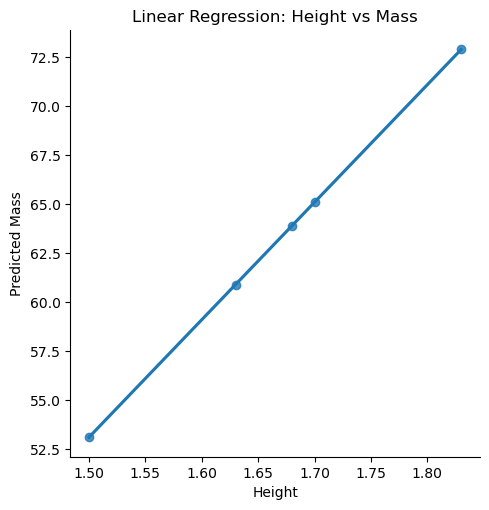

In [16]:
sb.lmplot(data=predicted_data,
          x='height',
          y='predicted_mass',
          fit_reg=True,
          height=5          
         ).set_axis_labels('Height', 'Predicted Mass')
plt.title("Linear Regression: Height vs Mass")

#### Answer


This plot supports the observations seen on the jointplot, we can see by the lines in both graphs that sample data and predicted mass look quite the same. 

**Conclusion**  

The scatter plot using the DataFrame data allows you to visualize the linear relationship between height and predicted mass. Further, we can see that predicted points fit regularly in the line, of course, but they don't differ much from the sample data, which shows that the model worked well predicting the mass.